**1. Image Classification using ResNet- Demonstration**

1/1 [==============================] - 1s 1s/step
Predicted: [('n04554684', 'washer', 0.9998896)]


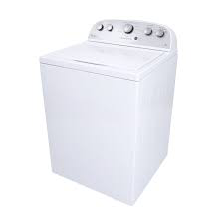

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50 as myModel
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
model=myModel(weights='imagenet')
img_path='/content/machine.jpg'
img=image.load_img(img_path,target_size=((224,224)))
x=image.img_to_array(img)
x=np.array([x])
x=preprocess_input(x)
x.shape
preds=model.predict(x)
np.argmax(preds[0])
print('Predicted:',decode_predictions(preds,top=1)[0])
display(img)

**2. Load Input Images**

In [9]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import decode_predictions,EfficientNetB7
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [10]:
data_dir_train='/content/drive/MyDrive/new_aud_images_train'
data_dir_val='/content/drive/MyDrive/new_aud_images_val'
data_dir_train=pathlib.Path(data_dir_train)
data_dir_val=pathlib.Path(data_dir_val)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create an ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 623 images belonging to 6 classes.
Found 156 images belonging to 6 classes.


**3 Transfer Modeling** 


> **3.1 Inception v3** 


In [18]:

# Load the Inceptionv3 model
inception_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(224,224,3))

# Create a new model with a global average pooling layer and a fully-connected layer

model=Sequential()
model.add(inception_model)
for layer in model.layers:
  layer.trainable=False

model.add(Dense(1024,activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=5,
    validation_data=val_generator,
    validation_steps=500)

# Predict the labels for the test data
predicted_labels = model.predict(val_generator)
predicted_labels

#Result for 5 epochs. Gives an accuracy of 99% if we run for 25 epochs

<ipython-input-18-bf705833f237>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
20/20 [==============================] - ETA: 0s - loss: 2.8545 - accuracy: 0.4719

20/20 [==============================] - 114s 6s/step - loss: 2.8545 - accuracy: 0.4719 - val_loss: 1.1329 - val_accuracy: 0.6987
Epoch 2/5
20/20 [==============================] - 79s 4s/step - loss: 0.9371 - accuracy: 0.6774
Epoch 3/5
20/20 [==============================] - 80s 4s/step - loss: 0.8209 - accuracy: 0.7239
Epoch 4/5
20/20 [==============================] - 74s 4s/step - loss: 0.7377 - accuracy: 0.7368
Epoch 5/5
20/20 [==============================] - 76s 4s/step - loss: 0.6341 - accuracy: 0.7881


5/5 [==============================] - 17s 3s/step


array([[2.68892641e-03, 6.55558527e-01, 1.69320572e-02, 3.50138880e-02,
        1.38273174e-02, 2.75979310e-01],
       [4.83667739e-02, 3.67951006e-01, 5.03867827e-02, 4.53098789e-02,
        2.53014266e-01, 2.34971136e-01],
       [1.05048614e-02, 9.48367044e-02, 5.91069281e-01, 1.21841328e-02,
        1.90245546e-02, 2.72380441e-01],
       [9.49547291e-02, 1.76136762e-01, 2.12675035e-01, 3.05825509e-02,
        2.09134743e-01, 2.76516229e-01],
       [1.94986130e-03, 7.42452517e-02, 5.01178624e-03, 8.73167515e-01,
        1.34016620e-02, 3.22239548e-02],
       [1.02130194e-04, 8.43361559e-05, 2.87716015e-04, 7.41822805e-05,
        9.99343336e-01, 1.08333355e-04],
       [5.54553699e-04, 7.66827085e-04, 7.65049481e-04, 6.16314181e-04,
        9.96489942e-01, 8.07328906e-04],
       [1.49984451e-04, 4.49388608e-04, 1.30430481e-03, 2.04556545e-05,
        2.80834676e-04, 9.97795105e-01],
       [1.72583815e-02, 3.04911405e-01, 1.15642034e-01, 1.16443910e-01,
        3.71054590e-01, 

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.01,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

**3.2 EfficientNetB7**



In [4]:
# Load the EfficientNet model
efficient_model = EfficientNetB7(weights='imagenet', include_top=False,input_shape=(224,224,3))

# Create a new model with a global average pooling layer and a fully-connected layer

model=Sequential()
model.add(efficient_model)
for layer in model.layers:
  layer.trainable=False

model.add(Dense(1024,activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=val_generator,
    validation_steps=500)



<ipython-input-4-38d8369f3898>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 4.3894 - accuracy: 0.2600 

20/20 [==============================] - 398s 19s/step - loss: 4.3894 - accuracy: 0.2600 - val_loss: 2.4753 - val_accuracy: 0.2564
Epoch 2/100
20/20 [==============================] - 290s 14s/step - loss: 2.9808 - accuracy: 0.2456
Epoch 3/100
20/20 [==============================] - 287s 14s/step - loss: 2.6705 - accuracy: 0.2327
Epoch 4/100
20/20 [==============================] - 289s 14s/step - loss: 2.2873 - accuracy: 0.2616
Epoch 5/100
20/20 [==============================] - 287s 14s/step - loss: 2.2751 - accuracy: 0.2905
Epoch 6/100
20/20 [==============================] - 287s 14s/step - loss: 2.1473 - accuracy: 0.2921
Epoch 7/100
20/20 [==============================] - 290s 14s/step - loss: 2.1784 - accuracy: 0.2552
Epoch 8/100
20/20 [==============================] - 297s 15s/step - loss: 1.8557 - accuracy: 0.2552
Epoch 9/100
20/20 [==============================] - 298s 15s/step - loss: 1.9612 - accuracy: 0.2841
Epoch 10/100
20/20 [==============================] - 299s 15

In [13]:
# Predict the labels for the test data
predicted_labels = model.predict(val_generator)
predicted_labels


5/5 [==============================] - 28s 5s/step


array([[1.67232298e-04, 3.16820864e-04, 6.05122405e-05, ...,
        1.45759905e-05, 1.39970551e-04, 6.82021142e-04],
       [1.25554550e-04, 2.43943214e-04, 4.46789309e-05, ...,
        1.15348084e-05, 1.06502011e-04, 6.50043250e-04],
       [1.60590280e-04, 3.23480635e-04, 6.11005598e-05, ...,
        1.41112514e-05, 1.31883280e-04, 6.75954972e-04],
       ...,
       [1.12840979e-04, 2.65857991e-04, 3.86084903e-05, ...,
        1.08205504e-05, 9.40203390e-05, 7.58320501e-04],
       [1.50780703e-04, 3.20756750e-04, 5.40335786e-05, ...,
        1.31334164e-05, 1.32556554e-04, 7.11383647e-04],
       [1.10160232e-04, 2.56990636e-04, 2.93025860e-05, ...,
        1.01321511e-05, 9.06633068e-05, 7.08626467e-04]], dtype=float32)

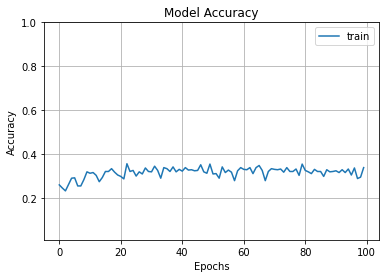

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.01,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

**3.3 Xception**

In [ ]:
# Load the Xception model
Xception_model = Xception(weights='imagenet', include_top=False,input_shape=(224,224,3))

# Create a new model with a global average pooling layer and a fully-connected layer

model=Sequential()
model.add(Xception_model)
for layer in model.layers:
  layer.trainable=False

model.add(Dense(1024,activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=val_generator,
    validation_steps=500)

# Predict the labels for the test data
predicted_labels = model.predict(val_generator)
predicted_labels

#Plot accuracy plot
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.01,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()




**3.4 ResNet50**

In [ ]:
# Load the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False,input_shape=(224,224,3))

# Create a new model with a global average pooling layer and a fully-connected layer

model=Sequential()
model.add(resnet_model)
for layer in model.layers:
  layer.trainable=False

model.add(Dense(1024,activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=val_generator,
    validation_steps=500)

# Predict the labels for the test data
predicted_labels = model.predict(val_generator)
predicted_labels

#Plot accuracy plot
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.01,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()


